
# Logistic Regression with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [ ]:
from google.colab import files
files.upload()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [8]:
train = pd.read_csv('titanic_train.csv')

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

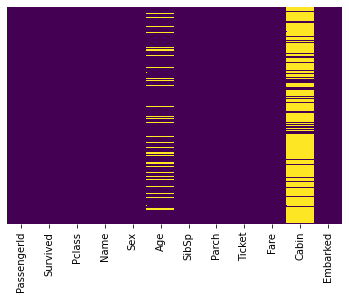

In [10]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data!

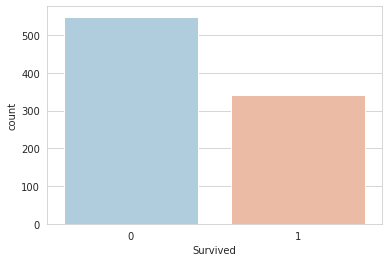

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

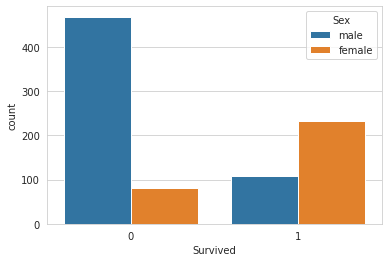

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

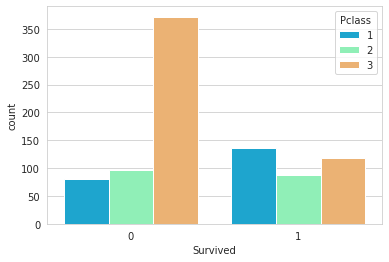

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

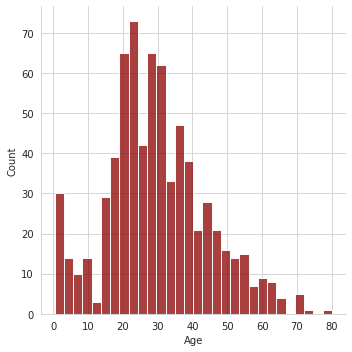

In [14]:
sns.displot(data=train, x=train['Age'].dropna(),kde=False,color='darkred',bins=30)

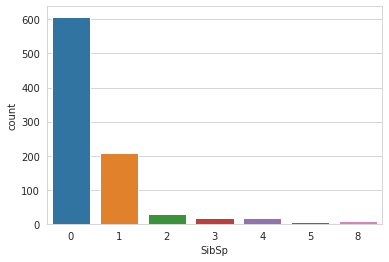

In [15]:
sns.countplot(x='SibSp',data=train)

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). **Question: What is the average age of all the passengers?** 

However we can be smarter about this and check the average age by passenger class. For example:

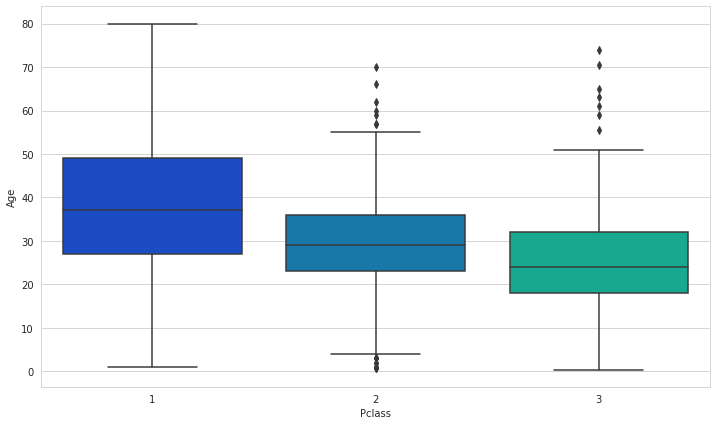

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.




In [17]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

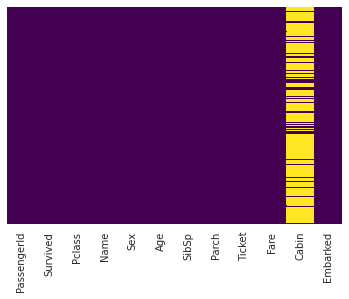

In [19]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [20]:
train.drop('Cabin',axis=1,inplace=True)

In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [24]:
train=pd.get_dummies(data=train, columns=['Sex','Embarked'], drop_first=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


We drop two variables that have non-numeric values. Also, PassengerId is just an id. So we do not expect that it would affect the survival chance. So drop the variable, too.



In [26]:
train_final=train.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [27]:
train_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(train_final.drop('Survived',axis=1), 
                                                    train_final['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

**Note that L2 regularization is applied by default in the logistic regression model.** We do not discuss the regularization in a regression model. But, it is an important concept that helps reduce the overfitting problem. Other regularized regression models are Lasso and Ridge Regressions. Please refer to the following page for detail: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c




In [31]:
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [32]:
predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

Let's move on to evaluate our model!

## Evaluation

We can get the confusion matrix. 

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


The confusion matrix represents: <br>
(Actual class 0, Predicted class 0), (Actual class 0, Predicted class 1) <br>
(Actual class 1, Predicted class 0), (Acutal class 1, Predicted class 1) <br>

**Question: What is the accuracy score? (Poll)**

We can check precision,recall,f1-score using classification report!

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



**Question: How do you interpret precision and recall? Which measure do you think is more important in this context?**

#### Note: For information about precision, receall, and f1-score, please refer to the following link: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report

recall for class 1 is 68/(68+36)=0.65 <br>
precision for class 1 is 68/(68+15)=0.82 <br>
f1-score for class 1 is (1+1^2)X0.82X0.65/(1^2X0.82+0.65)=0.73

The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of precision in the combined score.

In [37]:
from sklearn.metrics import roc_curve, auc

In [38]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

Text(0.5, 0, 'False Positive Rate')

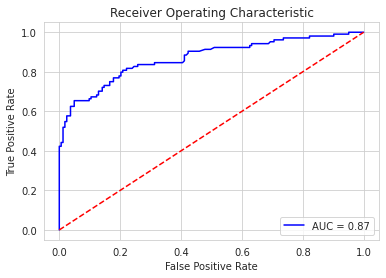

In [39]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Not so bad! You might want to explore other feature engineering. Some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

### Small exercise 
Can you grap the Title ()(Dr.,Mr.,Mrs,etc..) from the Name variable? Do you see that the prediction is improved with the additional information? 

Let's first grab the Title from train dataframe. We will use a regular expression. 

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [41]:
import re

def found_title(x):
    return re.search(', (.+?). ', x).group(1)

train['Title']=train['Name'].apply(found_title)

In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,Mr


**Question: How many different titles are there? (Poll)**

In [43]:
train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
th            1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

There are 17 titles. Many titles appear very rarely. So we only create binary variables for the following titles: Mr, Miss, Mrs, Master, Dr, Rev

In [44]:
train=pd.get_dummies(data=train, columns=['Title'])

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Capt',
       'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer', 'Title_Lady',
       'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle', 'Title_Mme',
       'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev', 'Title_Sir',
       'Title_th'],
      dtype='object')

In [45]:
train.drop(['Title_Capt', 'Title_Col',
       'Title_Don', 'Title_Jonkheer', 'Title_Lady', 'Title_Major',
       'Title_Mlle', 'Title_Mme', 'Title_Ms', 'Title_Sir', 'Title_th'], axis=1, inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,0,0,1,0,0


Drop two non-numeric variables : Name and Ticket. Drop PassengerID, too. 

In [47]:
train.drop(['Name','Ticket', 'PassengerId'], axis=1, inplace=True)

Now your data is ready. Follow the same procedure. 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
probs = logmodel.predict_proba(X_test)

Compare the performance of this model with that of the original model. **Which is better?**

In [49]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[153  10]
 [ 28  76]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       163
           1       0.88      0.73      0.80       104

    accuracy                           0.86       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.86      0.86      0.85       267



Text(0.5, 0, 'False Positive Rate')

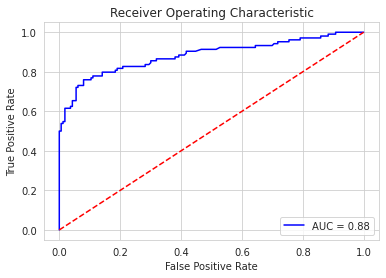

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

Now we can improve our machine learning approach. Let's first think about having a threefold split for hyper-parameter tuning. 

### Threefold split for hyper-parameters

We will learn how to use a threefold split for hyper-parameter tuning. To learn about hyper-parameter tuning, please refer to the following: https://scikit-learn.org/stable/modules/grid_search.html. We will have more chances to talk about hyper-parameter tuning in due course. 

We are also silent on regularization. Note that for this exercise, we use our original model set before we create a new feature with titles. 

In [51]:
X_trainval, X_test, y_trainval, y_test = train_test_split(train_final.drop('Survived',axis=1), 
                                                    train_final['Survived'], test_size=0.30, 
                                                    random_state=101)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=101)

In [52]:
val_scores = []
c_n=np.logspace(-3,3,7)
for i in c_n:
    print(i)
    logmodel = LogisticRegression(C=i,solver='liblinear')
    logmodel.fit(X_train, y_train)
    val_scores.append(logmodel.score(X_val, y_val))
print("best validation score: {:.3f}".format(np.max(val_scores)))
best_c_n=c_n[np.argmax(val_scores)]
print("best c_n: {}".format(best_c_n))

logmodel=LogisticRegression(C=best_c_n,solver='liblinear')
logmodel.fit(X_trainval, y_trainval) # note that this time we fit the model with best hyperparameters on training and validation sets
print("test score: {:.3f}".format(logmodel.score(X_test, y_test)))

0.001
0.01
0.1
1.0
10.0
100.0
1000.0
best validation score: 0.756
best c_n: 10.0
test score: 0.828


Now the new accuracy score for the tuned logistic regression model is 0.828, which is greater than the accuracy (0.81) of the default logistic regression model. Doing a hyperparameter tuning pays off. 

But, the improvement is much smaller than the improvement when we created and used a new feature with titles. 

### Grid Search with Cross Validation

To know more about how to implement cross validation with Python, please refer to the following: https://scikit-learn.org/stable/modules/cross_validation.html. You can also refer to the material posted on the Blackboard. 

In [53]:
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(train_final.drop('Survived',axis=1), 
                                                    train_final['Survived'], test_size=0.30, 
                                                    random_state=101)
cross_val_scores=[]
for i in c_n:
    logmodel = LogisticRegression(C=i,solver='liblinear')
    scores=cross_val_score(logmodel, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_c_n=c_n[np.argmax(cross_val_scores)]
print("best c_n: {}".format(best_c_n))

logmodel=LogisticRegression(C=best_c_n,solver='liblinear')
logmodel.fit(X_train, y_train)
print("test score: {:.3f}".format(logmodel.score(X_test, y_test)))

best cross-validation score: 0.794
best c_n: 100.0
test score: 0.831


Now the acurracy score is 0.831, which is quite similar to one when we use a threefold split.

We can actually use 'GridSearchCV' available on Scikit-learn to do more effectively. We will learn about it more with xgb model next week.  

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logmodel = LogisticRegression(solver='liblinear')

# A parameter grid for logistic regression
params = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }

grid = GridSearchCV(estimator=logmodel, param_grid=params, cv=10)

grid.fit(X_train, y_train)

print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_)
print('\n Best parameters:')
print(grid.best_params_)


 Best estimator:
LogisticRegression(C=100, solver='liblinear')

 Best score:
0.794495647721454

 Best parameters:
{'C': 100}


In [55]:
predictions = grid.best_estimator_.predict(X_test)
ac = accuracy_score(y_test, predictions)
print("accuracy: %f" % (ac))

accuracy: 0.831461


## Great Job!